# Hotel Review Analysis Using NLP

## Background

Understanding how customers respond to thier stay through reviews is vital responding to changes in customer expecations and remaining competitive in the the hotel market. Feedback comes in the form of reviews with positive feedback and negative feedback. This notebook will explore 225 MB of hotel review data and prepare it for a classifiation model. The end goal will be to read reviews and predict the overall rating a customer gives thier experience at the hotel. /

Link to the github

I'm going to ....

-----
## Setting up this notebook 

In [3]:
## Import Libraries 


from sklearn.model_selection import train_test_split # prepare data for modeling
from sklearn.feature_extraction.text import CountVectorizer # process text data

# data wrangling 
import pandas as pd # dataframe manipulation 
import numpy as np # dependancy for pyplot
import matplotlib.pyplot as plt # create visualizations
from time import time # used to measure run times 
import re # regular expressions 
from sklearn.model_selection import train_test_split # prepare data for modeling
from sklearn.feature_extraction.text import CountVectorizer # process text data

from sklearn.decomposition import PCA # principal component analysis 
from sklearn.model_selection import train_test_split #data preparation 
from sklearn.preprocessing import StandardScaler # data scaling
from sklearn.metrics import accuracy_score # scoring
from sklearn.model_selection import cross_val_score # scoring
from sklearn.metrics import plot_confusion_matrix # scoring
from sklearn.metrics import classification_report #scoring

# models
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [4]:
# Read in data
raw_data = pd.read_csv('data/Hotel_Reviews.csv')

# Exploritory Data Analyis 

### Data Dictionary

Each row is a hotel guest review of a stay along with some infromation about the hotel and the reviewer. The review is broken up with a positive and negative component and labled with tags that apply to the hotel stay being reviewed. Each review is stored alongside metadata and aggrgate metrics for both the hotel and reviewer. It appears each time a review is added mupltiple database records must be updated.  

**Hotel data**
- Hotel_Address - Property Address / business address
- Average_Score - Composite score for the hotel
- Hotel_Name - Property address/ business name
- Total_Number_of_Reviews - number of reviews completed by guests
- lat - latitude coodrinate
- lng - longitude coordinte



**Review specific data**
- Review_Date - date of feedback
- Negative_Review - text of negative portion of review
- Review_Total_Negative_Word_Counts - number of words in negative review
- Positive_Review - text of positive portion of review
- Review_Total_Positive_Word_Counts - number of words in positive review
- Reviewer_Score - the single number score a reviewer gives the hotel
- Tags - list features that apply to the stay being reviewed

**Reviewer Data**
- Reviewer_Nationality - Country of orgin of guest
- Total_Number_of_Reviews_Reviewer_Has_Given' - number of reviews the guest has given
- days_since_review - the time passed since the guests most recent review

**Other Data**
- Additional_Number_of_Scoring - It is not clear what this number represents. I suspect that this is a weighting factor that affects the average score calculation.



### Head, Info, Describe

In [9]:
print(f'The data constains {raw_data.shape[0]} rows and {raw_data.shape[1]} columns.')
display(raw_data.head(5))
display(raw_data.info())
display(raw_data.describe())

The data constains 515738 rows and 17 columns.


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

None

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


### Numeric Property Distibutions

Insights 
- Word counts distibution for positive and negative reviews are similar
- Additital Number of Scoring has a smiliar distribution shape as the total number of a reviews. Perhaps the total number of reviews is tied to addtional scoring
- The distibution of Reviewer Score and average score do not match. This seems suprising at first, but considering that the average score is always made up of a collection of indivutial scores the almost normal distribution of the average score makes sense. 

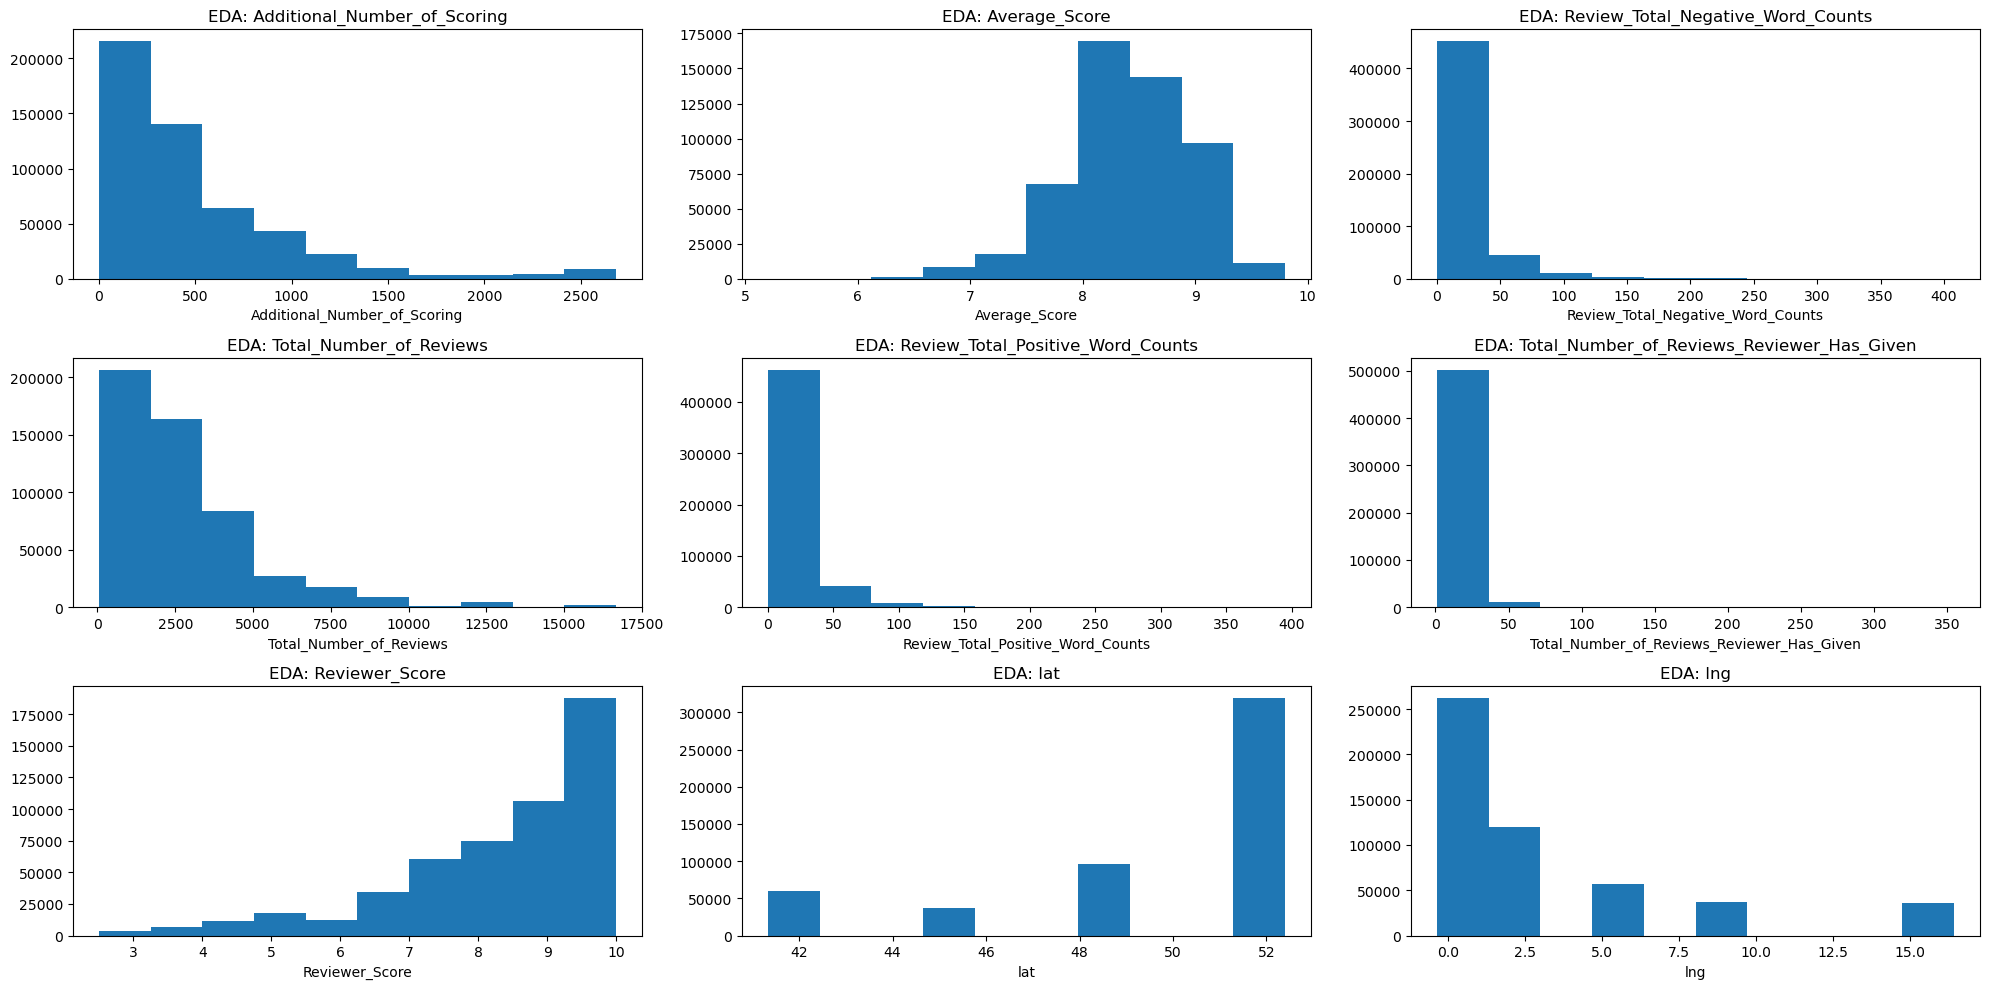

In [11]:
i = 1
plt.subplots(3,3, figsize=(20,10))

for col in raw_data.select_dtypes(exclude='object').columns:
    
    plt.subplot(3,3,i)
    plt.hist(raw_data[col], bins=10)
    plt.title(f'EDA: {col}')
    plt.xlabel(col)
    i +=1

plt.tight_layout()
plt.show()


### Data Cleaning
Round the Ratings

In [21]:
print(f'Rating categories in raw data {raw_data["Reviewer_Score"].value_counts().shape[0]}')

# Round each review score and then save in a new colums as an integer
raw_data['Rating Int'] = round(raw_data['Reviewer_Score']).astype(int)

# Look at the results

print(f'Rating categories after rounding {raw_data["Rating Int"].value_counts().shape[0]}')

print(raw_data['Rating Int'].value_counts())


Rating categories in raw data 37
Rating categories after rounding 9
10    187744
8     110155
9     105722
7      44088
6      27800
5      24188
4       9436
3       4406
2       2199
Name: Rating Int, dtype: int64


**The reviews are scored from 1 to 10. What do you expect the distribution of scores to look like? What is the actual distribution of reviews?**

Generally data is expected to follow a normal distibution. In the case of reviews this is should not be exected since the motivation to leave a review may come an outlier experience. Given this I would expect to see reviews clustered around the high and low end of the scale. 

The actual distibution shows the reviews are tend to be on the higher side of the scale with ratings of 8 - 10.


This raises issues since any model we train will be biased toward a higher rating because our sample population consists of higher ratings. The model will have more information about what makes a good review than what makes a bad review. 


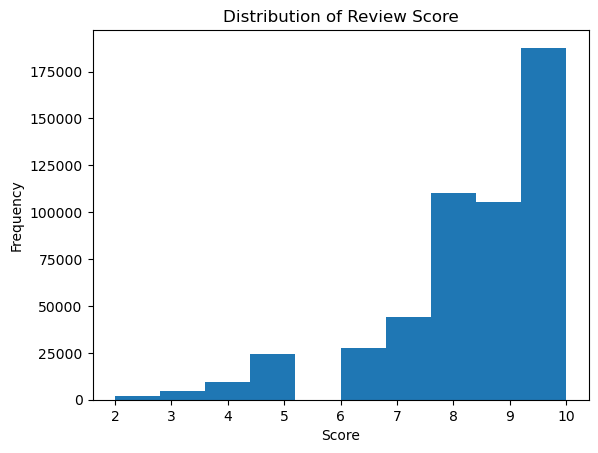

In [23]:
#plot the distibution of ratings

plt.figure()
plt.hist(raw_data['Rating Int'])
plt.title('Distribution of Review Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

## 2
**This dataset has a good mix of numeric and non-numeric columns. Which columns are numeric? Which are non-numeric? Can you turn some of the non-numeric columns to numeric?**

Here is the breakdown of numeric and non numeric fields. `days_since_review` and `Review_date` can easily be changed to numeric columns. `Reviewer_Nationality` could be converted using a one hot encoding. `Tags`, `Positive_Review` and `Negative_Review` could be coverted using count vecortizors.

**Numeric**
- Additional_Number_of_Scoring               
- Average_Score                               
- Review_Total_Negative_Word_Counts             
- Total_Number_of_Reviews                       
- Review_Total_Positive_Word_Counts             
- Total_Number_of_Reviews_Reviewer_Has_Given  
- Reviewer_Score                              
- lat                                         
- lng                                        
- Rating Int                                  

**Non-numeric**
- Hotel_Address
- Review_Date 
- Hotel_Name
- Reviewer_Nationality                        
- Negative_Review                             
- Positive_Review                            
- Tags                                        
- days_since_review      




In [ ]:
# Look at the number of countries represented 
raw_data['Reviewer_Nationality'].value_counts()

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
                               ...  
 Cape Verde                        1
 Northern Mariana Islands          1
 Tuvalu                            1
 Guinea                            1
 Palau                             1
Name: Reviewer_Nationality, Length: 227, dtype: int64

# Data Wrangling 
**Build the proper dataset separation (Optional but recommended: The dataset is actually too big to run quickly on most laptops. Feel free to sample ~10% of the data as your dataset from this point on. Make sure all classes are included in your subsample.)**

using the pandas sample function a new sample dataframe was created. The make up of ratings was compared to the original data to confrim that all rating classes are represented in similar proportion. 

In [24]:
# create a new dataframe that is a sample of the entire data set
smaller_df = raw_data.sample(frac=.1, random_state=40)

## reindex the new dataframe
smaller_df = smaller_df.reset_index(drop=True)

#check the shapes to confrim a success 
print(f'Orginal data shape{raw_data.shape}')
print(f'Sampled data shape {smaller_df.shape}')
print(f'The sample dataframe has {round(smaller_df.shape[0]/raw_data.shape[0]*100,0)}% of the rows as the original df.')


Orginal data shape(515738, 18)
Sampled data shape (51574, 18)
The sample dataframe has 10.0% of the rows as the original df.


In [25]:
# Confrim proprtionate class representation between the orginal and new dataframes

# Create a df to store the class mixes
validation_df = pd.DataFrame()

# calculate the class mixes and add them to the new df
validation_df['Raw mix'] = round(raw_data.value_counts('Rating Int', normalize=True)*100,0)
validation_df['sample mix'] = round(smaller_df.value_counts('Rating Int', normalize=True)*100,0)

# show the new df
validation_df.sort_values(by=['Rating Int'])

,Raw mix,sample mix
Rating Int,,
2,0.0,0.0
3,1.0,1.0
4,2.0,2.0
5,5.0,5.0
6,5.0,5.0
7,9.0,8.0
8,21.0,22.0
9,20.0,21.0
10,36.0,36.0


## 3.a
**Convert the Reviewer_Score column into a binary column in the following way. Reviews that are below 9 should be encoded as 0 ('not good') and reviews with scores 9 and 10 as 1 ('good').**

`numpy.where` makes this kind of binary classification really easy. The breakdown between classes is nearly 50-50 which is good for modeling. 

In [26]:
# Create a list of good scores
good_scores = [9,10]

# replace ratings with a binary 
smaller_df['Rating Int'] = np.where(smaller_df['Rating Int'].isin(good_scores),1,0)


In [27]:
# look at the breakdown
smaller_df['Rating Int'].value_counts()

1    29299
0    22275
Name: Rating Int, dtype: int64

## 3.b 
**Convert the columns you identified in question 2 into numeric columns, and drop all non-numeric columns except Positive_Review and Negative_Review**

Earlier it was noted `days_since_review` and `Review_date` can easily be changed to numeric columns. `Reviewer_Nationality` and  `Tags` could be transfromed as well. Using nationality as a predicitve feature is something that could add bias to the model. `Tags` seem to be more helpful in finding reviews on a certain topic than saying anything about the qaulity of the experience. As they are more descriptive than predeictive they will be dropped and the focus for classification will be on the review text. 

`days_since_review` has a number along with the word 'day' or 'days' with it. This can easily converted using `srt.split`.

`Review date` can be coverted using date and time features of pandas 



In [28]:
## remove separate the number and text in the `days_since_review` columns and store the number chars as int

smaller_df['days_since_review'] = smaller_df['days_since_review'].str.split(' ').str[0].astype('int')

In [29]:
# Look at the results
smaller_df['days_since_review'].value_counts()

120    243
1      243
322    225
338    203
534    196
      ... 
122     16
615     16
124     15
121     13
123     12
Name: days_since_review, Length: 731, dtype: int64

In [30]:
## convert the dates since last review to a dat time columns

smaller_df['Review_Date'] = pd.to_datetime(smaller_df['Review_Date'])

In [34]:
# Look at the results

smaller_df['Review_Date'][:5]

0   2017-02-17
1   2016-02-16
2   2016-07-09
3   2015-12-07
4   2017-05-14
Name: Review_Date, dtype: datetime64[ns]

In [35]:
## drop other object columns

# get a list of object cols
object_cols_to_drop = list(smaller_df.select_dtypes(include='object').columns)

# remove the cols I want to keep
object_cols_to_drop.remove('Negative_Review')
object_cols_to_drop.remove('Positive_Review')

# drop the remaining object cols
smaller_df.drop(object_cols_to_drop, axis=1, inplace= True)

In [36]:
# look at the remaining columns

smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51574 entries, 0 to 51573
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Additional_Number_of_Scoring                51574 non-null  int64         
 1   Review_Date                                 51574 non-null  datetime64[ns]
 2   Average_Score                               51574 non-null  float64       
 3   Negative_Review                             51574 non-null  object        
 4   Review_Total_Negative_Word_Counts           51574 non-null  int64         
 5   Total_Number_of_Reviews                     51574 non-null  int64         
 6   Positive_Review                             51574 non-null  object        
 7   Review_Total_Positive_Word_Counts           51574 non-null  int64         
 8   Total_Number_of_Reviews_Reviewer_Has_Given  51574 non-null  int64         
 9   Review

## 3.c
**Split the data into train and test sets**

Spliting the dataset into test and training sets in important when modeling. It provides an opportunity to look evaluate the perfromance of the model against labeled data it has not yet encountered. 

In [37]:
# Separate the target column from the data column

X = smaller_df.drop('Rating Int',axis=1)
y = smaller_df['Rating Int']

#set up the test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


## 3.d + e
**Use a count vectorizer to combine Positive_Review and Negative_Review with the numeric data (notice that this is done AFTER the train/test split). You should vectorize each column separately, ending up with two sparse matrixes, and then combine the three matrixes (numeric data, positive matrix, negative matrix). You may have to adjust the min_df parameter.**

Since the data has punctuation already removed the tokenization step of vecotorization is not needed. It is still helpful to remove the stopwords and set the `min_df` parameter. `min_df` is the parameter that determines the theshold for including a string in the bag of words. Strings that appear in fewer than the parameter speficies are excluded from the bag. This parameter was adjusted until both positive and negative reviews yielded 10 words. 

Once the feature words are selected and a sparse matix was formed for each, they were added to the main datafrme. The last step was to remove duplicate columns. In this case duplicate columns are those words that apppeared in both postive reviews and negative reviews. These words being ambiguious will not add anything of value to the model. 

In [80]:

# Create the bag of words for positive reviews
positive_bagofwords = CountVectorizer(min_df = 15, stop_words='english')
positive_bagofwords.fit(X_train['Positive_Review'])

# transfrom the bag of words to a sparse matrix
positive_bagofwords_transfromed = positive_bagofwords.transform(X_train['Positive_Review'])

#Count the number of words the bag of words categorized

len(positive_bagofwords.get_feature_names_out())

1805

In [82]:
# Create a user friendly df from the bag of words and tag them as positive
positive_sparse_df = pd.DataFrame(columns=positive_bagofwords.get_feature_names_out(), data=positive_bagofwords_transfromed.toarray()).add_prefix('p_',)
display(positive_sparse_df)

,p_00,p_02,p_10,p_100,p_100m,p_10min,p_10th,p_11,p_12,p_13,...,p_wouldn,p_wow,p_wrong,p_yards,p_year,p_years,p_yes,p_yogurt,p_young,p_yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
#create a sprase matrix for the negative reviews

negative_bagofwords = CountVectorizer(min_df = 25, stop_words='english')
negative_bagofwords.fit(X_train['Negative_Review'])

# transfrom the bag of words to a sparse matrix
negative_bagofwords_transfromed = negative_bagofwords.transform(X_train['Negative_Review'])

#Count the number of words the bag of words categorized
len(negative_bagofwords.get_feature_names_out())

1640

In [83]:
# Create a user friendly df from the bag of words
negative_sparse_df = pd.DataFrame(columns=negative_bagofwords.get_feature_names_out(), data=negative_bagofwords_transfromed.toarray()).add_prefix('n_')
display(negative_sparse_df)

,n_00,n_10,n_100,n_10pm,n_11,n_11pm,n_12,n_13,n_14,n_15,...,n_worth,n_wouldn,n_write,n_written,n_wrong,n_year,n_years,n_yes,n_young,n_zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# look at the lists of words chosen 

print(f'Negative bag of words {negative_bagofwords.get_feature_names_out()}')
print(f'Positive bag of words {positive_bagofwords.get_feature_names_out()}')

Negative bag of words ['00' '10' '100' ... 'yes' 'young' 'zero']
Positive bag of words ['00' '02' '10' ... 'yogurt' 'young' 'yummy']


In [85]:
# combine the three dataframes
df = pd.concat([smaller_df,positive_sparse_df, negative_sparse_df], axis=1)

In [86]:
# Look for duplicate columns
duplicate_col = df.columns[df.columns.duplicated()]
print(duplicate_col)

Index([], dtype='object')


In [91]:
df.shape

(51574, 3459)